In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# SN2
- predicting the mean is a poor estimation for the enthalpies from the Sn2 dataset since the spread is fairly large

In [2]:
df_sn2 = pd.read_csv("data/SN2-20/reactions.csv", index_col=0)
enthalpies = df_sn2["rxn_nrj"].to_numpy()
enthalpies.shape

(2670,)

<AxesSubplot:>

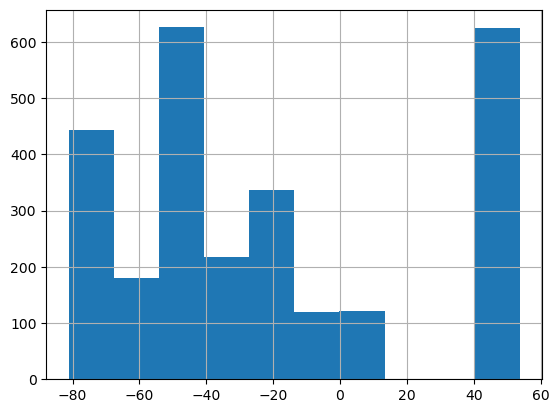

In [3]:
df_sn2["rxn_nrj"].hist()

In [4]:
y_pred = [enthalpies.mean()] * len(enthalpies)
mae = mean_absolute_error(enthalpies, y_pred)
print(f'MAE: {mae:.2f} kcal/mol')

rmse = mean_squared_error(enthalpies, y_pred, squared=False)
print(f'RMSE: {rmse:.2f} kcal/mol')

MAE: 36.14 kcal/mol
RMSE: 43.20 kcal/mol


# GDB7
- Predicting the mean gives an MAE of 18 kcal/mol. Interestingly, all kernels using $X_r$ also had an MAE of about 18 kcal/mol and some BoB models show even worse performance, so training those specific models was counterproductive.

In [5]:
df_gdb7 = pd.read_csv("data/GDB7-20-TS/dataset.csv")
barriers = df_gdb7["ea kcal/mol"].to_numpy()
barriers.shape

(11961,)

<AxesSubplot:>

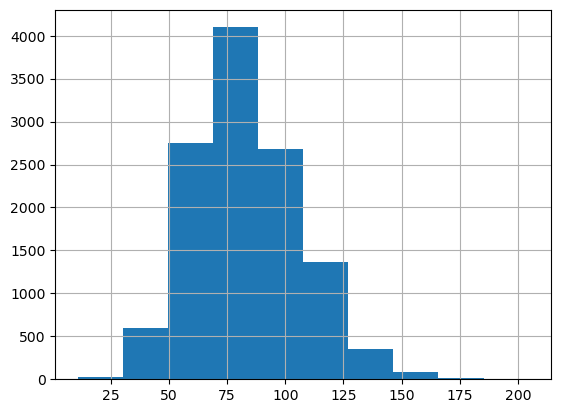

In [6]:
df_gdb7["ea kcal/mol"].hist()

In [7]:
y_pred = [barriers.mean()] * len(barriers)
mae = mean_absolute_error(barriers, y_pred)
print(f'MAE: {mae:.2f} kcal/mol')

rmse = mean_squared_error(barriers, y_pred, squared=False)
print(f'RMSE: {rmse:.2f} kcal/mol')

MAE: 18.03 kcal/mol
RMSE: 22.75 kcal/mol


# Proparg
- Predicting the mean gives an MAE of 3 kcal/mol since the distribution of barriers is relatively narrow. Interestingly, all kernels using $X_r$ give similar performance as predicting the mean, and SLATM$_r$ actually had worse performance.

In [8]:
df_proparg = pd.read_csv("data/Proparg-21-TS/data.csv", index_col=0)
barriers = df_proparg.dErxn.to_numpy()
barriers.shape

(754,)

<AxesSubplot:>

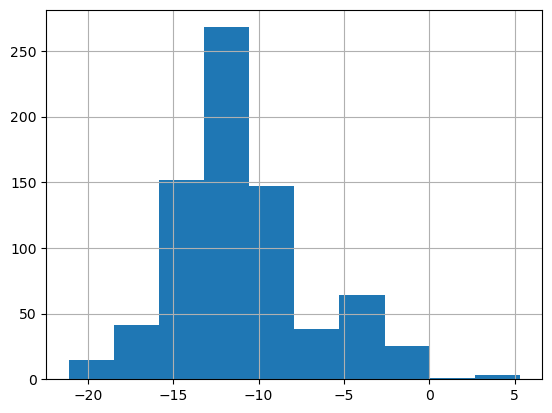

In [9]:
df_proparg.dErxn.hist()

In [10]:
y_pred = [barriers.mean()] * len(barriers)
mae = mean_absolute_error(barriers, y_pred)
print(f'MAE: {mae:.2f} kcal/mol')

rmse = mean_squared_error(barriers, y_pred, squared=False)
print(f'RMSE: {rmse:.2f} kcal/mol')

MAE: 3.01 kcal/mol
RMSE: 4.02 kcal/mol


# Hydroform
The distribution of barriers is very narrow for each of these 3 datasets, which creates a relatively easy learning task.

### Co

In [11]:
co_df = pd.read_csv("data/Hydroform-22-TS/Co_clean.csv")
co_barriers = co_df["f_barr"]
co_barriers.describe()

count    726.000000
mean       9.404585
std        2.629771
min        0.553325
25%        8.007696
50%        9.283708
75%       10.593989
max       26.032570
Name: f_barr, dtype: float64

<AxesSubplot:>

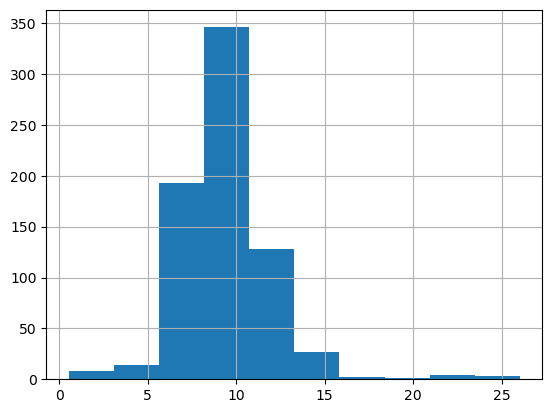

In [12]:
co_barriers.hist()

In [13]:
mean_eas = [co_barriers.mean()] * len(co_barriers)
y_true = co_barriers.values
mae = mean_absolute_error(y_true, mean_eas)
print(f'Predicting the mean barrier gives an MAE of {mae:.2f} kcal/mol')

Predicting the mean barrier gives an MAE of 1.78 kcal/mol


### Ir

In [14]:
ir_df = pd.read_csv("data/Hydroform-22-TS/Ir_clean.csv")
ir_barriers = ir_df["f_barr"]
ir_barriers.describe()

count    809.000000
mean      22.801530
std        2.489324
min        9.001423
25%       21.293211
50%       22.591409
75%       23.913640
max       38.831217
Name: f_barr, dtype: float64

<AxesSubplot:>

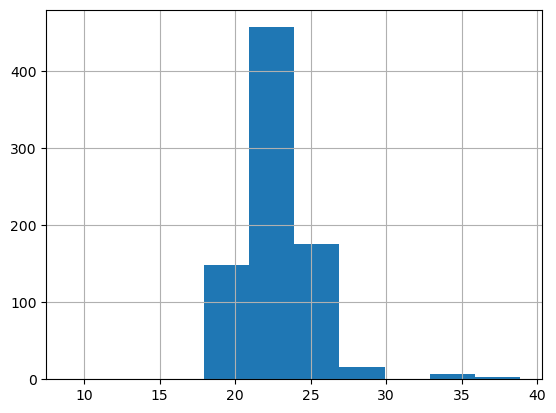

In [15]:
ir_barriers.hist()

In [16]:
mean_eas = [ir_barriers.mean()] * len(ir_barriers)
y_true = ir_barriers.values
mae = mean_absolute_error(y_true, mean_eas)
print(f'Predicting the mean barrier gives an MAE of {mae:.2f} kcal/mol')

Predicting the mean barrier gives an MAE of 1.71 kcal/mol


### Rh

In [17]:
rh_df = pd.read_csv("data/Hydroform-22-TS/Rh_clean.csv")
rh_barriers = rh_df["f_barr"]
rh_barriers.describe()

count    815.000000
mean      14.791278
std        2.005064
min        3.476415
25%       13.549016
50%       14.765048
75%       15.894427
max       26.358355
Name: f_barr, dtype: float64

<AxesSubplot:>

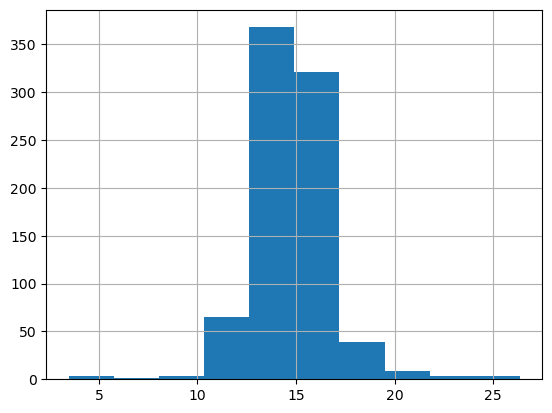

In [18]:
rh_barriers.hist()

In [19]:
mean_eas = [rh_barriers.mean()] * len(rh_barriers)
y_true = rh_barriers.values
mae = mean_absolute_error(y_true, mean_eas)
print(f'Predicting the mean barrier gives an MAE of {mae:.2f} kcal/mol')

Predicting the mean barrier gives an MAE of 1.42 kcal/mol


In [20]:
# concatenate all together
barriers = pd.concat((co_barriers, ir_barriers, rh_barriers), axis=0)
barriers.describe()

count    2350.000000
mean       15.884705
std         5.960651
min         0.553325
25%        10.824476
50%        14.993367
75%        21.539527
max        38.831217
Name: f_barr, dtype: float64

In [21]:
mean_eas = [barriers.mean()] * len(barriers)
y_true = barriers.values

In [22]:
mae = mean_absolute_error(y_true, mean_eas)
print(f'predicting the mean dE0 gives an MAE of {mae:.2f} kcal/mol')

predicting the mean dE0 gives an MAE of 5.04 kcal/mol


Predicting the mean of all 3 transition metals gives a test MAE of 5 kcal/mol, which is substantially worse than the published KRR model by van Gerwen et al. However, as shown below, if we can simply classify which transition metal is present, which is known information during inference, then the testing MAE is 1.63 kcal/mol. In context, this makes the reported test MAE of 0.85-1.1 kcal/mol for the various models presented by van Gerwen et al. to offer only modest improvement.

In [23]:
mean_eas = np.concatenate(([co_barriers.mean()] * len(co_barriers), 
                           [ir_barriers.mean()] * len(ir_barriers),
                           [rh_barriers.mean()] * len(rh_barriers)
                          )
                         )
mae = mean_absolute_error(barriers.values, mean_eas)
print(f'Predicting the mean barriers gives an MAE of {mae:.2f} kcal/mol')

Predicting the mean barriers gives an MAE of 1.63 kcal/mol
